.Machine

In [2]:
pip install scikit-optimize


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error, mean_absolute_error, r2_score
from sklearn.feature_selection import VarianceThreshold

In [4]:
data = pd.read_csv('/content/machine_failure.csv')

In [5]:
data.shape

(10000, 14)

In [6]:
data.head()


,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],machine_failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


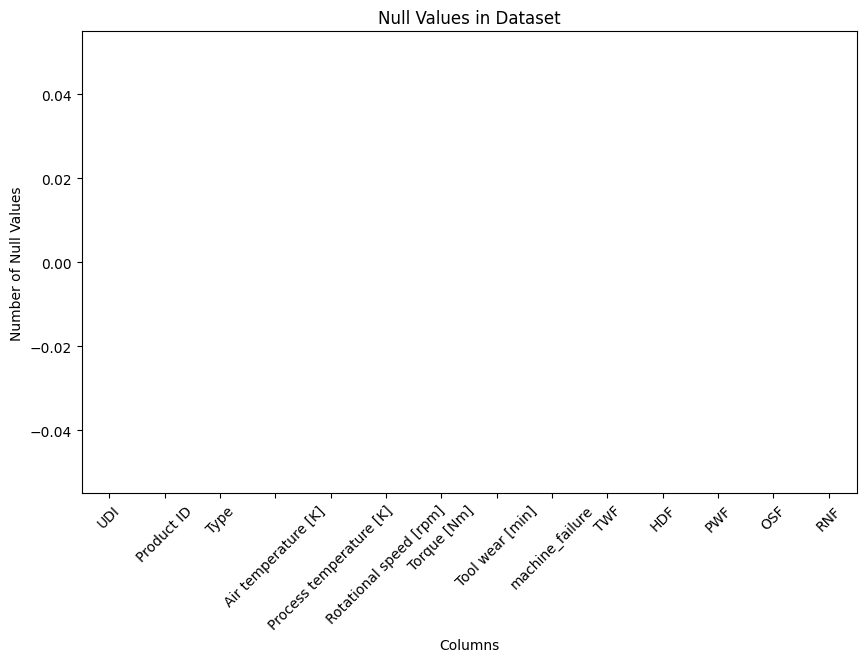

In [7]:
null_values = data.isnull().sum()

# Plot null values
plt.figure(figsize=(10, 6))
null_values.plot(kind='bar', color='skyblue')
plt.xlabel('Columns')
plt.ylabel('Number of Null Values')
plt.title('Null Values in Dataset')
plt.xticks(rotation=45)
plt.show()

In [8]:
X = data.iloc[:, 3:7]
y = data['machine_failure']


# **FEATURE SELECTION**

In [9]:
selector = VarianceThreshold(threshold=0.01)
X_selected = selector.fit_transform(X)
selected_feature_names = X.columns[selector.get_support()]

In [10]:
print("Selected Features after applying Variance Threshold:")
print(selected_feature_names)

Selected Features after applying Variance Threshold:
Index(['Air temperature [K]', 'Process temperature [K]',
       'Rotational speed [rpm]', 'Torque [Nm]'],
      dtype='object')


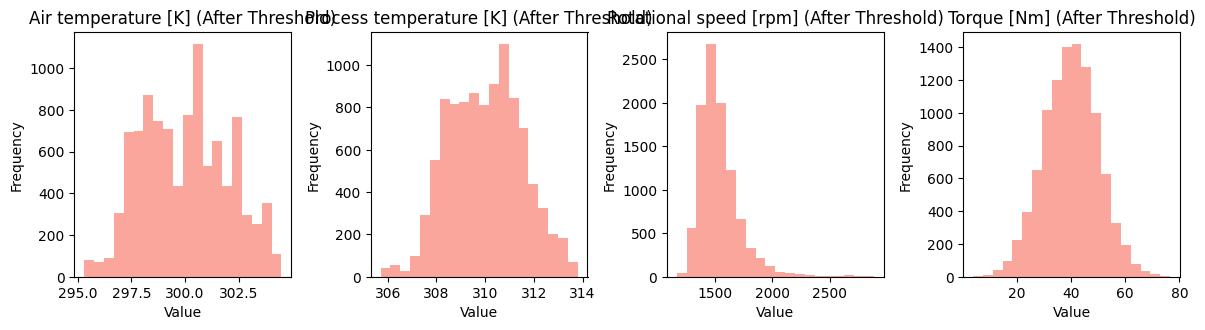

In [11]:
plt.figure(figsize=(12, 6))

for i, feature in enumerate(selected_feature_names):
    plt.subplot(2, len(selected_feature_names), len(selected_feature_names) + i + 1)
    plt.hist(X_selected[:, i], bins=20, color='salmon', alpha=0.7)
    plt.title(f'{feature} (After Threshold)')
    plt.xlabel('Value')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# **SPLITING THE DATA AND SLECTING THE MODELS**

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_selected, y, test_size=0.2, random_state=42)


In [13]:
models = {
    'Linear Regression': LinearRegression(),
    'Logistic Regression': LogisticRegression(),
    'Linear Discriminant Analysis': LinearDiscriminantAnalysis(),
    'Classification and Regression Trees': DecisionTreeClassifier(),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors (KNN)': KNeighborsClassifier(),
    'Support Vector Machines (SVM)': SVC(),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
}

In [14]:
accuracies = {}

In [15]:
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, r2_score, mean_squared_error, mean_absolute_error, precision_score, recall_score, f1_score, matthews_corrcoef

accuracies = {}

results = pd.DataFrame(columns=['Accuracy', 'Precision', 'Recall', 'F1 Score', 'MCC'])

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    if hasattr(model, 'predict_proba'):  # Check if the model is a classifier
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        mcc = matthews_corrcoef(y_test, y_pred)
        accuracies[name] = accuracy

        results.loc[name] = [accuracy, precision, recall, f1, mcc]

        print(f'Accuracy for {name}: {accuracy}')
        print('Confusion Matrix:')
        print(confusion_matrix(y_test, y_pred))
        print('Classification Report:')
        print(classification_report(y_test, y_pred))
        print()
    else:  # Model is a regressor
        r_squared = r2_score(y_test, y_pred)
        accuracies[name] = r_squared

        results.loc[name] = [r_squared, None, None, None, None]

        print(f'R-squared for {name}: {r_squared}')
        print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
        print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
        print()

print("Accuracies:")
print(results)


R-squared for Linear Regression: 0.11440095498176528
Mean Squared Error: 0.02618694236142795
Mean Absolute Error: 0.07228532707780709

Accuracy for Logistic Regression: 0.9725
Confusion Matrix:
[[1932    7]
 [  48   13]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.65      0.21      0.32        61

    accuracy                           0.97      2000
   macro avg       0.81      0.60      0.65      2000
weighted avg       0.97      0.97      0.97      2000


Accuracy for Linear Discriminant Analysis: 0.9705
Confusion Matrix:
[[1917   22]
 [  37   24]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.99      0.98      1939
           1       0.52      0.39      0.45        61

    accuracy                           0.97      2000
   macro avg       0.75      0.69      0.72      2000
weighted avg       0.97      0.97     

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy for AdaBoost: 0.975
Confusion Matrix:
[[1932    7]
 [  43   18]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.72      0.30      0.42        61

    accuracy                           0.97      2000
   macro avg       0.85      0.65      0.70      2000
weighted avg       0.97      0.97      0.97      2000


Accuracies:
                                     Accuracy  Precision    Recall  F1 Score  \
Linear Regression                    0.114401        NaN       NaN       NaN   
Logistic Regression                  0.972500   0.650000  0.213115  0.320988   
Linear Discriminant Analysis         0.970500   0.521739  0.393443  0.448598   
Classification and Regression Trees  0.968500   0.485714  0.557377  0.519084   
Naive Bayes                          0.964500   0.361111  0.213115  0.268041   
K-Nearest Neighbors (KNN)            0.970000   0.516129  0.262295  0.347826   
Sup

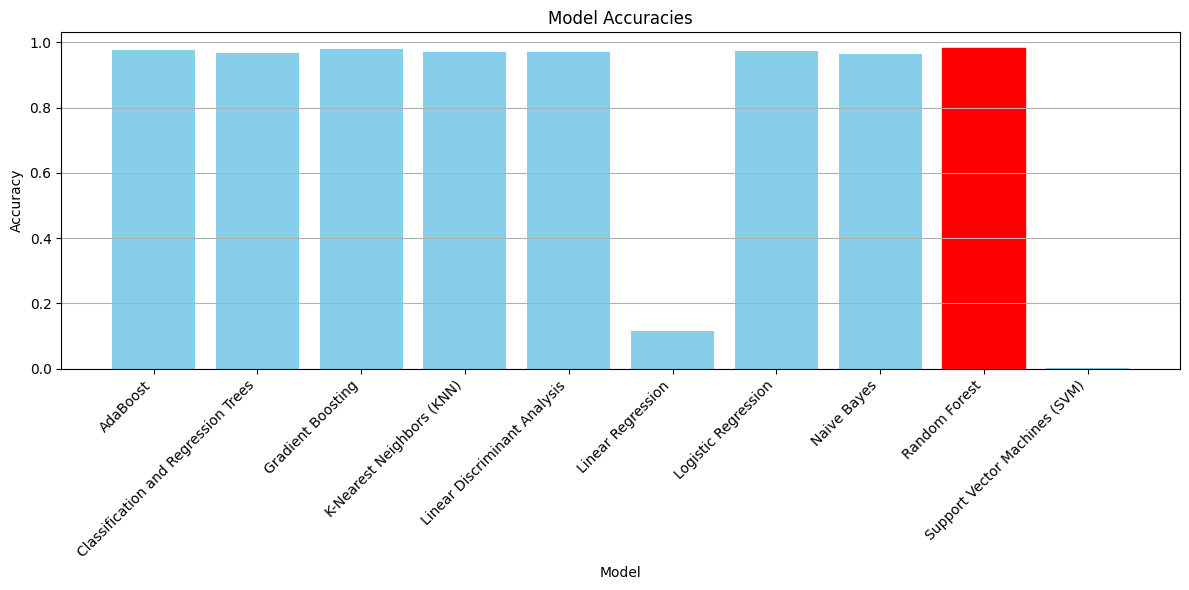

In [16]:
import matplotlib.pyplot as plt
accuracy_df = pd.DataFrame.from_dict(accuracies, orient='index', columns=['Accuracy'])
accuracy_df.sort_index(inplace=True)
best_model = accuracy_df['Accuracy'].idxmax()


plt.figure(figsize=(12, 6))
bars = plt.bar(accuracy_df.index, accuracy_df['Accuracy'], color='skyblue')
bars[accuracy_df.index.get_loc(best_model)].set_color('red')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Accuracies')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


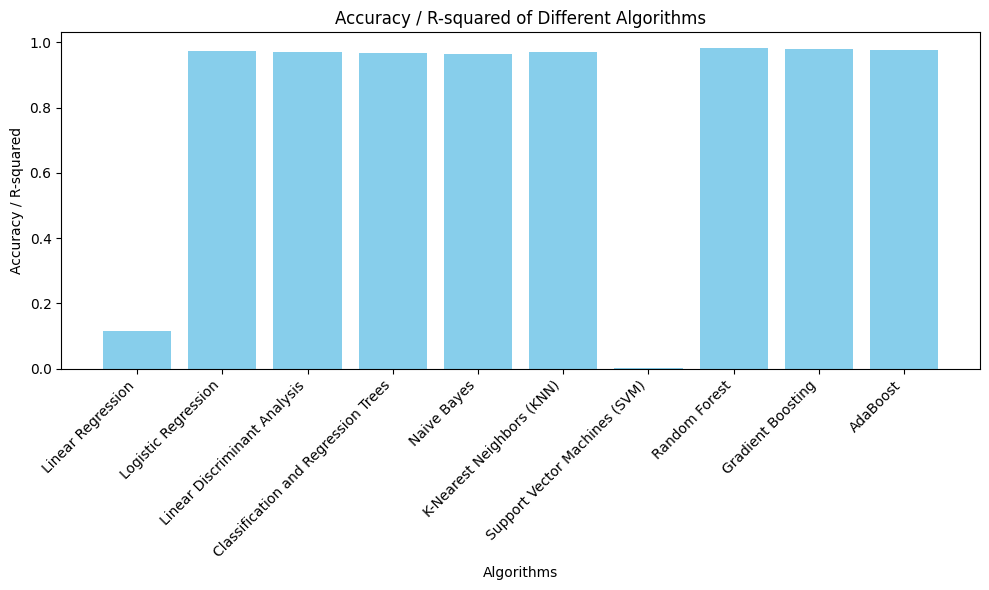

In [17]:
plt.figure(figsize=(10, 6))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Algorithms')
plt.ylabel('Accuracy / R-squared')
plt.title('Accuracy / R-squared of Different Algorithms')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **SELECTING THE BEST ACCURACY MODEL**

In [18]:
rf_classifier = RandomForestClassifier()


rf_classifier.fit(X_train, y_train)


y_pred = rf_classifier.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'** Accuracy **: {accuracy}')
print('Confusion Matrix:')
print(confusion)
print('Classification Report:')
print(report)



** Accuracy **: 0.9815
Confusion Matrix:
[[1933    6]
 [  31   30]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99      1939
           1       0.83      0.49      0.62        61

    accuracy                           0.98      2000
   macro avg       0.91      0.74      0.80      2000
weighted avg       0.98      0.98      0.98      2000



# **AOC AREA UNDRED THE CURVE**

TPR: 0.4918032786885246
FPR: 0.0030943785456420837


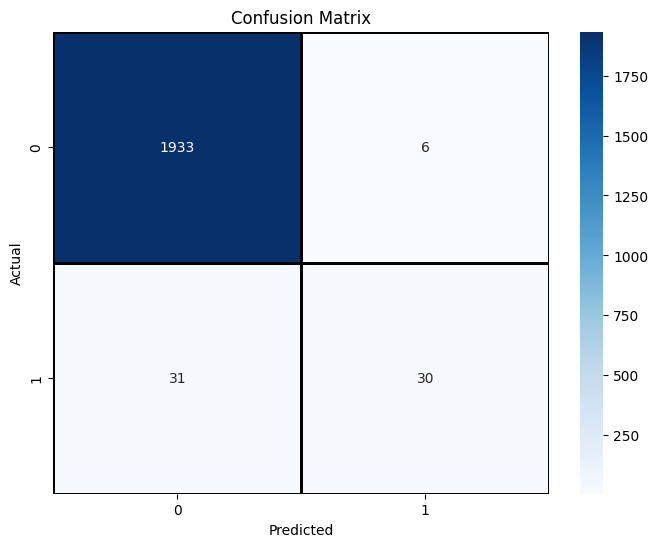

In [19]:
from sklearn.metrics import confusion_matrix

tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(f'TPR: {tpr}')
print(f'FPR: {fpr}')

import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Assuming y_test and y_pred are the true labels and predicted labels respectively for the binary classification task
conf_matrix = confusion_matrix(y_test, y_pred)

# Creating a heatmap for the confusion matrix with a black border
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', linewidths=1, linecolor='black')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


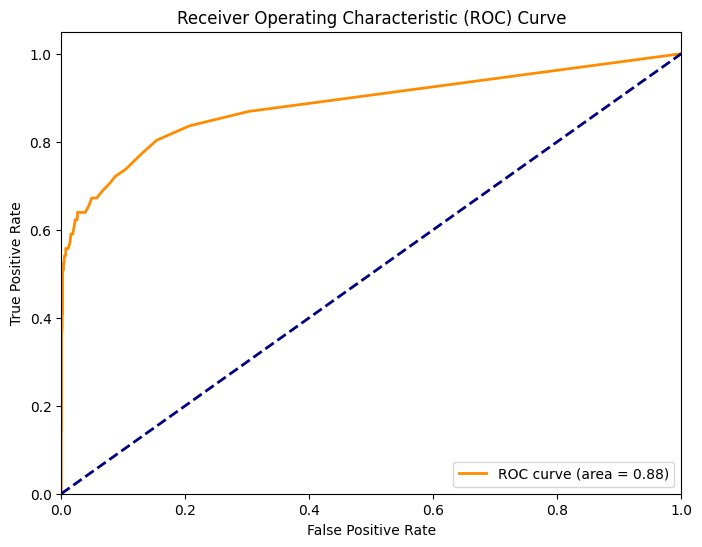

In [20]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier

# Assuming you have already trained your Random Forest model and obtained predictions
random_forest = RandomForestClassifier()
random_forest.fit(X_train, y_train)
y_pred_proba = random_forest.predict_proba(X_test)[:,1]

# Calculate false positive rate (fpr), true positive rate (tpr), and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


# **USING OPTIMIZER TO INCRESE THE ACCURACY**

In [21]:
pip install crayfish

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, matthews_corrcoef
from sklearn.model_selection import ParameterGrid

# Define the Random Forest model
clf = RandomForestClassifier()

# Define parameter grid
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],   # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],   #ode
    'min_samples_leaf': [1, 2, 4]
}

# Initialize variables to store the best metrics and parameters
best_accuracy = -1
best_params = None
best_precision = -1
best_recall = -1
best_f1_score = -1
best_mcc = -2  # Minimum value of MCC is -1, initialize with a value lower than -1

# Perform grid search
for params in ParameterGrid(param_grid):
    # Set parameters for the classifier
    clf.set_params(**params)

    # Fit the classifier on the training data
    clf.fit(X_train, y_train)  # Assuming y_train is available for supervised learning

    # Predict on the test data
    y_pred = clf.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    mcc = matthews_corrcoef(y_test, y_pred)

    # Update best parameters if accuracy improves
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

    # Update best precision, recall, F1-score, and MCC if they improve
    if precision > best_precision:
        best_precision = precision
    if recall > best_recall:
        best_recall = recall
    if f1 > best_f1_score:
        best_f1_score = f1
    if mcc > best_mcc:
        best_mcc = mcc

# Print the best parameters and evaluation metrics
print("Best Parameters:", best_params)
print("Best Accuracy:", best_accuracy)
print("Best Precision:", best_precision)
print("Best Recall:", best_recall)
print("Best F1 Score:", best_f1_score)
print("Best MCC:", best_mcc)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best Accuracy: 0.983
Best Precision: 0.8857142857142857
Best Recall: 0.5245901639344263
Best F1 Score: 0.6530612244897959
Best MCC: 0.6661513210754578


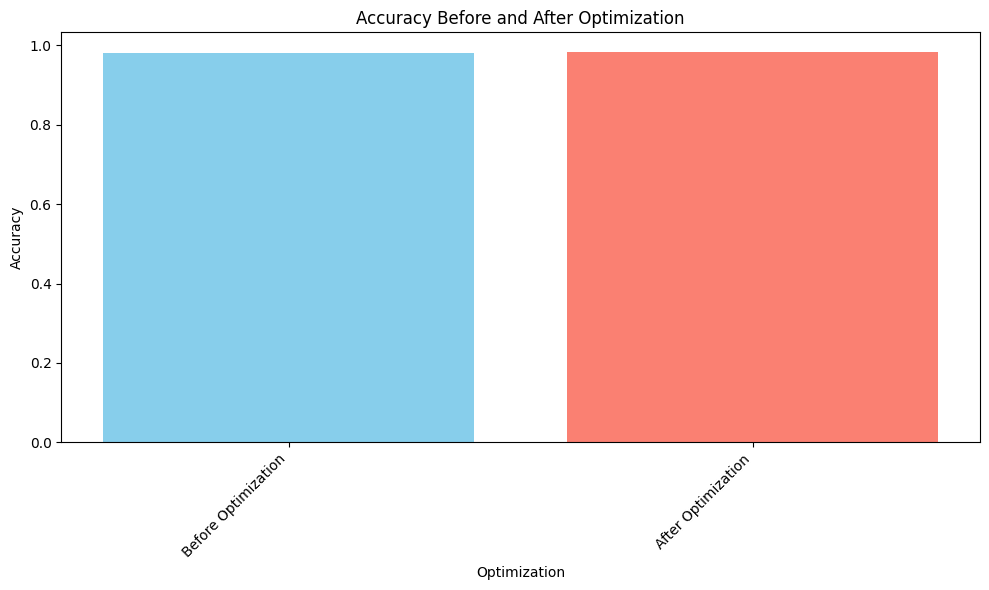

In [23]:

plt.figure(figsize=(10, 6))
plt.bar(['Before Optimization', 'After Optimization'], [accuracy, best_accuracy], color=['skyblue', 'salmon'])
plt.xlabel('Optimization')
plt.ylabel('Accuracy')
plt.title('Accuracy Before and After Optimization')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# **SAVING THE MODEL TO DEPLOY IT **

In [24]:
import joblib


trained_model = model

joblib.dump(trained_model, 'machine_failure_model.pkl')


joblib.dump(rf_classifier, 'random_forest_model.pkl')


loaded_model = joblib.load('random_forest_model.pkl')


input_values = [[298.1, 308.6, 1300, 65]]


predicted_failure = loaded_model.predict(input_values)


if predicted_failure[0] == 1:
    print("Maintenance is required.")
else:
    print("No maintenance needed.")

Maintenance is required.


In [25]:
import pickle

In [26]:
filename = 'main_model.sav'
pickle.dump(rf_classifier, open(filename, 'wb'))

In [27]:
# loading the saved model
loadded_model = pickle.load(open('main_model.sav', 'rb'))

In [28]:
import numpy as np
input_data = (250,300,20,20)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = loadded_model.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
  print('Maintenance not requierd')
else:
  print('Maintanence is required')

[0]
Maintenance not requierd


In [29]:
for column in X.columns:
  print(column)

Air temperature [K]
Process temperature [K]
Rotational speed [rpm]
Torque [Nm]
